# 이미지 비교

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt

## 1. 사전 지식

### 1.1. HSV
색상(Hue), 채도(Saturation), 명도(Value)의 3개 채널로 색을 표현   
https://bskyvision.com/46

### 1.2. 히스토그램 비교 함수

이미지의 색상값 분포를 나타내는 히스토그램을 비교하여 이미지를 비교   

> cv2.compareHist(hist1, hist2, method)

hist1과 hist2를 비교하여, 그 결과를 출력.   
method는 비교 알고리즘.

### 1.3. 히스토그램 비교 알고리즘(Method)

#### cv2.HISTCMP_CORREL : 상관관계
* 1: 완전 일치, -1: 완전 불일치, 0: 무관계
* 빠르지만 부정확

#### cv2.HISTCMP_CHISQR : 카이제곱 검정(Chi-Squared Test) 
* 0: 완전 일치, 무한대: 완전 불일치

#### cv2.HISTCMP_INTERSECT : 교차
* 1: 완전 일치, 0: 완전 불일치(히스토그램이 1로 정규화된 경우)

#### cv2.HISTCMP_BHATTACHARYYA : 바타차야 거리
* 0: 완전 일치, 1: 완전 불일치
* 느리지만 가장 정확

#### EMD
* 직관적이지만 가장 느림

### 1.4. 각 비교 알고리즘의 번호

In [4]:
print(cv2.HISTCMP_CORREL)
print(cv2.HISTCMP_CHISQR)
print(cv2.HISTCMP_INTERSECT)
print(cv2.HISTCMP_BHATTACHARYYA)

print("cv2.HISTCMP_CORREL\t\t : %d" % cv2.HISTCMP_CORREL)
print("cv2.HISTCMP_CHISQR\t\t : %d" % cv2.HISTCMP_CHISQR)
print("cv2.HISTCMP_INTERSECT\t\t : %d" % cv2.HISTCMP_INTERSECT)
print("cv2.HISTCMP_BHATTACHARYYA\t : %d" % cv2.HISTCMP_BHATTACHARYYA)

0
1
2
3
cv2.HISTCMP_CORREL		 : 0
cv2.HISTCMP_CHISQR		 : 1
cv2.HISTCMP_INTERSECT		 : 2
cv2.HISTCMP_BHATTACHARYYA	 : 3


위 결과와 같이, 각 비교 알고리즘의 명칭은 0~4의 숫자를 반환.

## 2. 이미지 불러오기

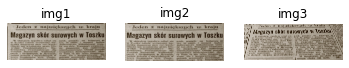

In [5]:
filename = 'Data/scan'
imgs = []

for i in range(1, 4):
    filename = filename + str(i)
    filename = filename + '.jpg'
    imgs.append(cv2.imread(filename))
    filename = 'Data/scan'

for i, img in enumerate(imgs):
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d' % (i+1))                   # 각 이미지에 제목 부여
    plt.axis('off')                              # 출력될 히스토그램의 축 제거
    plt.imshow(img[:,:,::-1])                    # 이미지의 y축, x축 유지, BGR을 RGB로 변환

### 코드 설명
1. 첫번째 반복문은 이름 형식을 만족하는 이미지들을 순서대로 불러옴. 이미지가 아무리 많아도 자동으로 읽어올 수 있게 하는 목적.
1. 두번째 반복문은 불러온 이미지를 하단에 출력. 이미지 읽기가 성공했는지 확인하기 위한 목적이므로 생략 가능.
1. 두번째 반복문에서 enumerate를 사용하여 i 변수에는 인덱스가, img 변수에는 리스트의 값(이미지)이 각각 전달되도록 함.

### 이미지 슬라이싱
1. img[:, :, :] : 이미지의 y축, x축 유지, BGR로 출력
1. img[::-1, :, :] : 이미지의 y축 반전, x축 유지, BGR로 출력
1. img[:, ::-1, :] : 이미지의 y축 유지, x축 반전, BGR로 출력
1. img[:, :, ::-1] : 이미지의 y축, x축 유지, BGR을 RGB로 변환하여 출력

## 3. 히스토그램 생성

1. 각 이미지를 HSV로 변환
1. Hue, Saturation 채널에 대한 히스토그램을 계산
1. 정규화

In [6]:
hists = []

for img in imgs:
    
    # 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # plt.imshow(hsv)
    
    # H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    # cv2.calcHist(images, channels, mask, histSize, ranges(, hist(, accumulate)))
    
    # 0~1 범위의 값으로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    
    # 정규화된 히스토그램을 hists 리스트에 덧붙이기 
    hists.append(hist)

## 4. 히스토그램 비교

In [7]:
def compareImage(str, index):
    
    for i, hist in enumerate(str):                           # 각 이미지 별로 비교 진행(이미지 개수만큼 반복)
        
        ret = cv2.compareHist(query, hist, index)            # 각 비교 알고리즘에 따라 img1과 각 이미지의 히스토그램 비교
        
        if index == cv2.HISTCMP_INTERSECT:                   # 교차 분석인 경우 
            ret = ret/np.sum(query)                          # 원본으로 나누어 1로 정규화
            
        print("img%d :%7.2f"% (i+1 , ret), end='\t')         # 비교 결과를 소수점 2번째 자리까지 출력(이미지 이름 및 결과 출력 후 탭)

In [8]:
query = hists[0]                                             # 1번 이미지를 원본으로 지정

methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']

for index, name in enumerate(methods):                       # 모든 비교 알고리즘 활용(4회 반복)
    
    print('%-10s' % name, end = '\t')                        # 비교 알고리즘 이름 출력(좌측 정렬 및 탭)
    compareImage(hists, index)                               # 함수 호출하여 비교 수행 및 결과 출력
    print()                                                  # 줄 바꿈

CORREL    	img1 :   1.00	img2 :   0.99	img3 :   0.92	
CHISQR    	img1 :   0.00	img2 :   1.71	img3 :  12.71	
INTERSECT 	img1 :   1.00	img2 :   0.93	img3 :   0.80	
BHATTACHARYYA	img1 :   0.00	img2 :   0.09	img3 :   0.21	
EMD       	img1 :   0.00	img2 :   1.45	img3 :   7.65	


## 상관관계 기법을 이용해 두 이미지가 같은지 판별

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt

imgs = []
imgs.append(cv2.imread('Data/scan1.jpg'))
imgs.append(cv2.imread('Data/scan1.jpg'))

hists = []

for img in imgs:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX) 
    hists.append(hist)

method = 2
query = hists[0]
ret = cv2.compareHist(query, hists[1], method)

if method == cv2.HISTCMP_INTERSECT:
    ret = ret/np.sum(query)   

if ret == 1:
    print('Same Image')
else:
    print('Different Image')

Different Image


In [10]:
import cv2
import numpy as np
import matplotlib.pylab as plt

imgs = []
imgs.append(cv2.imread('Data/news.jpg'))
imgs.append(cv2.imread('Data/news.jpg'))

hists = []
for img in imgs:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)

query = hists[0]

methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']

for index, name in enumerate(methods):
    print('%-10s' % name, end = '\t')  
    
    for i, histogram in enumerate(hists):
        ret = cv2.compareHist(query, histogram, index) 
        
        if index == cv2.HISTCMP_INTERSECT:
            ret = ret/np.sum(query)
            
        print("img%d :%7.2f"% (i+1 , ret), end='\t')

    print()

CORREL    	img1 :   1.00	img2 :   1.00	
CHISQR    	img1 :   0.00	img2 :   0.00	
INTERSECT 	img1 :   1.00	img2 :   1.00	
BHATTACHARYYA	img1 :   0.00	img2 :   0.00	
EMD       	img1 :   0.00	img2 :   0.00	


## 이미지 비교하여 서로 다른 영역 찾아내기(Mac)

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pylab as plt
from skimage.metrics import structural_similarity as compare_ssim

# 이미지 출력 함수 정의
def showImage(str1, str2):
    cv2.imshow('My Image1', str1)
    cv2.imshow('My Image2', str2)
    
    if cv2.waitKey(0) == ord('q'):
        cv2.destroyAllWindows()
        cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1)

# 이미지 로드
imgs = []
imgs.append(cv2.imread('Data/img1.jpg'))
imgs.append(cv2.imread('Data/img2.jpg'))
# imgs[0] = cv2.resize(imgs[0], (500, 200))
# imgs[1] = cv2.resize(imgs[1], (500, 200))

# 이미지 전처리(흑백으로 변환, 크기 조정)
processedImg = []
for img in imgs:
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    processedImg.append(grayImg)

# 이미지 비교
_, diff = compare_ssim(processedImg[0], processedImg[1], full = True)
np.set_printoptions(threshold = np.inf, linewidth = np.inf)
# sys.stdout = open('Data/output.txt', 'w')
# print(diff)q

# for i in range(len(diff)):
#     for j in range(len(diff[i])):
#         if i != 0:
#             if diff[i][j] == diff[i - 1][j]:
#                 print('(%d, %d)' % (i, j))
diff = (diff * 255).astype('uint8')

# 이진화
_, result = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.erode(result, kernel, iterations = 2)

cv2.imshow('My Image', dilation)
if cv2.waitKey(0) == ord('q'):
    cv2.destroyAllWindows()
    cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1)

# 서로 다른 영역 추출
contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, 3)
for c in contours:
    area = cv2.contourArea(c)
    if area > 60:
        img1 = cv2.drawContours(imgs[0], contours, -1, (255, 0, 0), 15)
        img2 = cv2.drawContours(imgs[1], contours, -1, (0, 255, 0), 15)

# 결과 출력
showImage(img1, img2)

In [2]:
def showImage(str1, str2):
    cv2.imshow('My Image1', str1)
    cv2.imshow('My Image2', str2)
    if cv2.waitKey(0) == ord('q'):
        cv2.destroyAllWindows()
        cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1)

In [14]:
import cv2
import numpy as np
import sys
import matplotlib.pylab as plt
from skimage.metrics import structural_similarity as compare_ssim

imgs.clear()
processedImg.clear()
diff = 0
dilation = 0
contours = 0
area = 0
img1 = 0
img2 = 0

# 이미지 로드
imgs = []
imgs.append(cv2.imread('Data/img1.jpg'))
imgs.append(cv2.imread('Data/img2.jpg'))

# 이미지 전처리(흑백으로 변환)
processedImg = []
for img in imgs:
    grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    processedImg.append(grayImg)

# 이미지 비교
_, diff = compare_ssim(processedImg[0], processedImg[1], full = True)
np.set_printoptions(threshold = np.inf, linewidth = np.inf)
diff = (diff * 255).astype('uint8')

# 이진화
_, result = cv2.threshold(diff, 190, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(result, kernel, iterations = 2)

# Closing 연산
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)

cv2.imshow('My Image', closing)
if cv2.waitKey(0) == ord('q'):
    cv2.destroyAllWindows()
    cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1); cv2.waitKey(1)

# 서로 다른 영역 추출(컨투어 기법을 이용한 시각화)
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, 3)
for c in contours:
    area = cv2.contourArea(c)
    if area > 600.0:
        img1 = cv2.drawContours(imgs[0], contours, -1, (0, 255, 0), 3)
        img2 = cv2.drawContours(imgs[1], contours, -1, (0, 0, 255), 3)

# 결과 출력
showImage(img1, img2)